In [7]:
##### Data Preprocessing #####

# Packages import #

import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input, BatchNormalization
from keras.optimizers import Adam

In [2]:
opt = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

def Create_model_CNN():
	model = Sequential()

	model.add(Conv2D(12, 3, strides=(1, 1),  kernel_initializer='glorot_uniform',padding='same', input_shape=(214,100,3)))
	model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
	model.add(Dropout(0.2, noise_shape=None, seed=None))

	model.add(Conv2D(24, 3, strides=(1, 1),  kernel_initializer='glorot_uniform',padding='same', input_shape=(214,100,3)))
	model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
	model.add(Dropout(0.2, noise_shape=None, seed=None))

	model.add(Conv2D(48, 3, strides=(1, 1),  kernel_initializer='glorot_uniform',padding='same', input_shape=(214,100,3)))
	model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
	model.add(Dropout(0.2, noise_shape=None, seed=None))
	

	model.add(Flatten())
	model.add(Dense(3, activation='softmax'))
	
	return model

model = Create_model_CNN()
model.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])

In [3]:
# Load model weights

model.load_weights(r"best_CNN.hdf5")

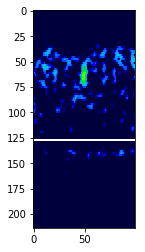

Prediction =  [[0.91723615 0.00907817 0.07368565]]
Solid :  91.72 %
Gaseous :  0.91 %
Artifact :  7.37 %


In [8]:
# Solid #

image_file = r"solid.PNG"

im = mpimg.imread(image_file)

imgplot = plt.imshow(im)
plt.show()

im = im.reshape(1, 214, 100, 3)



#Prediction

prediction = model.predict(im)
print('Prediction = ', prediction)
print('Solid : ' , round((prediction[0,0]) * 100, 2), '%')
print('Gaseous : ' , round(prediction[0,1] * 100, 2), '%')
print('Artifact : ' , round(prediction[0,2] * 100, 2), '%')

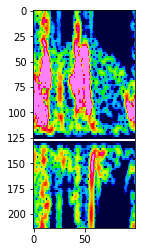

Prediction =  [[2.0383515e-18 1.0000000e+00 1.1120063e-17]]
Solid :  0.0 %
Gaseous :  100.0 %
Artifact :  0.0 %


In [9]:
# Gaseous #

image_file = r"gaseous.PNG"

im = mpimg.imread(image_file)

imgplot = plt.imshow(im)
plt.show()

im = im.reshape(1, 214, 100, 3)


#Prediction

prediction = model.predict(im)
print('Prediction = ', prediction)
print('Solid : ' , round((prediction[0,0]) * 100, 2), '%')
print('Gaseous : ' , round(prediction[0,1] * 100, 2), '%')
print('Artifact : ' , round(prediction[0,2] * 100, 2), '%')

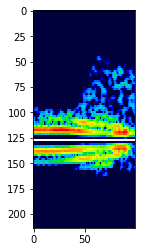

Prediction =  [[5.0041580e-04 5.3733111e-05 9.9944586e-01]]
Solid :  0.05 %
Gaseous :  0.01 %
Artifact :  99.94 %


In [10]:
# Artifact #

image_file = r"artifact.PNG"

im = mpimg.imread(image_file)

imgplot = plt.imshow(im)
plt.show()

im = im.reshape(1, 214, 100, 3)



#Prediction

prediction = model.predict(im)
print('Prediction = ', prediction)
print('Solid : ' , round((prediction[0,0]) * 100, 2), '%')
print('Gaseous : ' , round(prediction[0,1] * 100, 2), '%')
print('Artifact : ' , round(prediction[0,2] * 100, 2), '%')